# HOMEWORK 1: Valutazione
Si è usato trec_eval di Terrier per effettuare la valutazione, si sono quindi ottenuti i valori di:
* MAP: dal campo map all
* Precision@10: dal campo P_10 all
* Rprec: da Rprec all
Mentre risulta necessario calcolare ANOVA-oneway

# Identificazione delle run:
Le run sono identificate come segue:
* RUN#0: modello BM25 con indice con PorterStemmer e Stopwords;
* RUN#1: modello TFIDF con indice con PorterStemmer e Stopwords;
* RUN#2: modello BM25 con indice con PorterStemmer;
* RUN#3: modello TFIDF con indice senza PorterStemmer e Stopwords.

In [11]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
#creo la funzione che mi popolerà gli array
def insertAll(file,array,parameter):
    file=open(file)
    lines = file.readlines()
    #print(array,parameter)
    for index in range(len(lines)):
        line=lines[index]
        line=line.split()
        #print(line[0])
        #print(parameter)
        if (line[0]==parameter) and (line[1]!="all"):
            #print(line)
            array.append(line[2])
        elif (line[0]==parameter) and (parameter=="map") and(line[1]=="all"):
            print(line)
            maps.append(line[2])
#apro tutti i file delle valutazioni
valutazioneBM25_0  = "C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\valutazioneBM25_0.txt"
#creo l'array che conterrà i valori che cerco
ap_bm250=[]
p10_bm250=[]
rprec_bm250=[]
maps=[]
#apro tutti i file delle valutazioni
valutazioneTFIDF_1  = "C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\valutazioneTFIDF_1.txt" 
#creo l'array che conterrà i valori che cerco
ap_tfidf1=[]
p10_tfidf1=[]
rprec_tfidf1=[]
map_run1=None
#apro tutti i file delle valutazioni
valutazioneBM25_2  = "C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\valutazioneBM25_2.txt" 
#creo l'array che conterrà i valori che cerco
ap_bm252=[]
p10_bm252=[]
rprec_bm252=[]
map_run2=None
#apro tutti i file delle valutazioni
valutazioneTFIDF_3  = "C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\valutazioneTFIDF_3.txt" 
#creo l'array che conterrà i valori che cerco
ap_tfidf3=[]
p10_tfidf3=[]
rprec_tfidf3=[]
map_run3=None
#BM25_0
print("Sto creando i vettori della RUN#0: BM25...")
insertAll(valutazioneBM25_0,ap_bm250,"map")
#print("AP:",ap_bm250)
insertAll(valutazioneBM25_0,p10_bm250,"P_10")
#print("P10:",p10_bm250)
insertAll(valutazioneBM25_0,rprec_bm250,"Rprec")
#print("RPREC:",rprec_bm250)
#TFIDF_1
print("Sto creando i vettori della RUN#1: TFIDF...")
insertAll(valutazioneTFIDF_1,ap_tfidf1,"map")
insertAll(valutazioneTFIDF_1,p10_tfidf1,"P_10")
insertAll(valutazioneTFIDF_1,rprec_tfidf1,"Rprec")
#print("AP:",ap_tfidf1)
#print("P10:",p10_tfidf1)
#print("RPREC:",rprec_tfidf1)
#BM25_2
print("Sto creando i vettori della RUN#2: BM25... ")
insertAll(valutazioneBM25_2,ap_bm252,"map")
#print("AP:",ap_bm252)
insertAll(valutazioneBM25_2,p10_bm252,"P_10")
#print("P10:",p10_bm252)
insertAll(valutazioneBM25_2,rprec_bm252,"Rprec")
#print("RPREC:",rprec_bm252)
#TFIDF_3
print("Sto creando i vettori della RUN#3: TFIDF... ")
insertAll(valutazioneTFIDF_3,ap_tfidf3,"map")
insertAll(valutazioneTFIDF_3,p10_tfidf3,"P_10")
insertAll(valutazioneTFIDF_3,rprec_tfidf3,"Rprec")
#print("AP:",ap_tfidf3)
#print("P10:",p10_tfidf3)
#print("RPREC:",rprec_tfidf3)
print("Vettori creati!")
Fvalue, pvalue = stats.f_oneway(ap_bm250, ap_tfidf1, ap_bm252, ap_tfidf3)
print("F-value:",Fvalue,"P-value:",pvalue)
print(maps)

Sto creando i vettori della RUN#0: BM25...
['map', 'all', '0.1828']
Sto creando i vettori della RUN#1: TFIDF...
['map', 'all', '0.1821']
Sto creando i vettori della RUN#2: BM25... 
['map', 'all', '0.1857']
Sto creando i vettori della RUN#3: TFIDF... 
['map', 'all', '0.1693']
Vettori creati!
F-value: 0.09965024788515882 P-value: 0.9601256241314807
['0.1828', '0.1821', '0.1857', '0.1693']


In [2]:
#controllo la validità dell'ipotesi, confronto alpha con pvalue e eventualmente lo sostituisco
alpha=0.05
if pvalue<alpha:
    print("Rifiuto la null-hypothesis")
    alpha=pvalue
else:
    print("Accetto la null-hypothesis")


Accetto la null-hypothesis


In [3]:
#Funzione ANOVA e Tukey
from statsmodels.stats.multicomp import MultiComparison
def Tukey(vector0,vector1,vector2,vector3,runID,alpha,x):
    vectorAll=np.concatenate([vector0, vector1, vector2, vector3])
    mc = MultiComparison(vectorAll.astype('float'), runID)
    result = mc.tukeyhsd(alpha)
    result.plot_simultaneous(xlabel=x,ylabel="RUN")

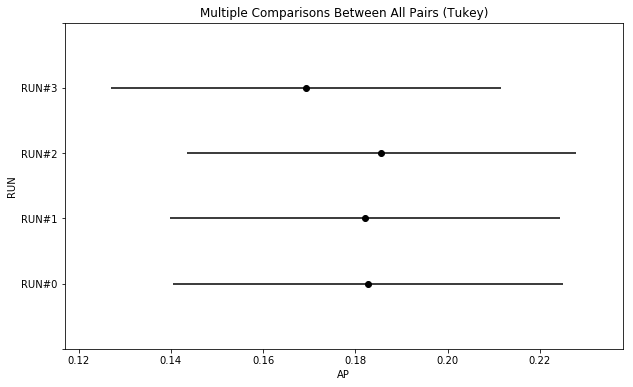

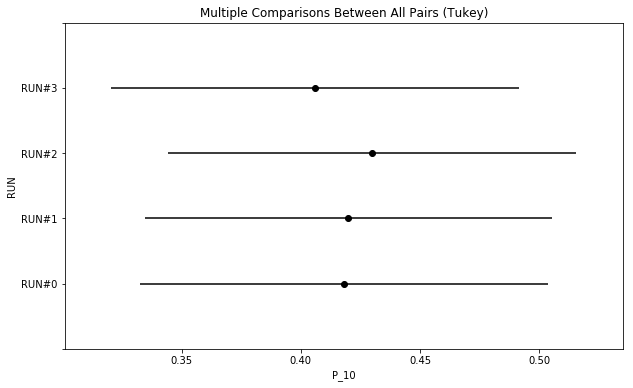

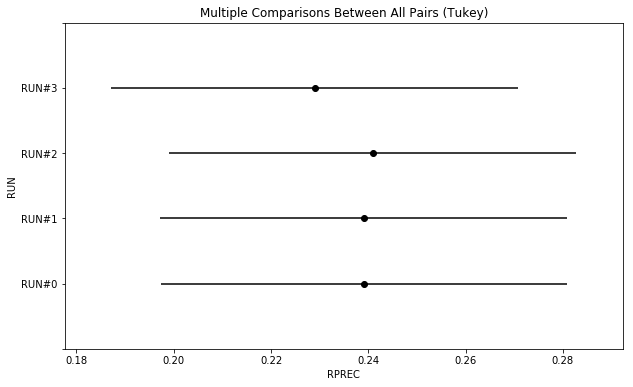

In [4]:
runID=[]
for i in range(4):
#popolo il vettore
    for index in range(50):
        runID.append("RUN#"+str(i))
        
Tukey(ap_bm250, ap_tfidf1, ap_bm252, ap_tfidf3,runID,alpha,"AP")
Tukey(p10_bm250, p10_tfidf1, p10_bm252, p10_tfidf3,runID,alpha,"P_10")
Tukey(rprec_bm250, rprec_tfidf1, rprec_bm252, rprec_tfidf3,runID,alpha,"RPREC")

# Plot dei risultati
Ora inserisco i grafici con i risultati di MAP,AP per i vari topic e per le varie RUN

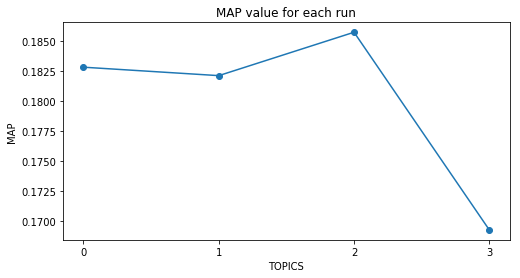

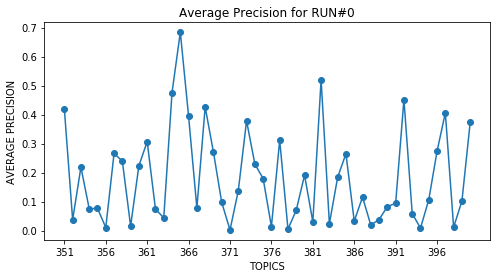

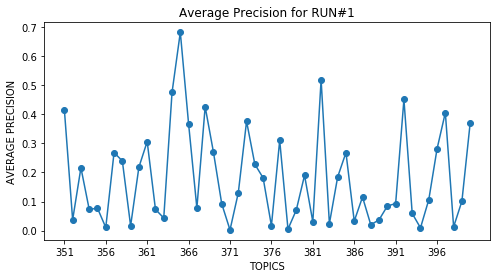

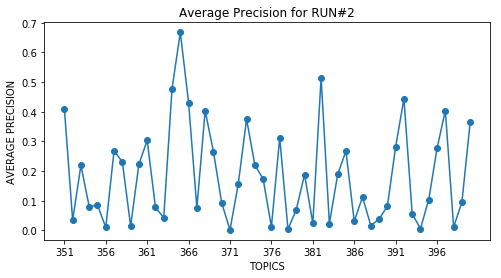

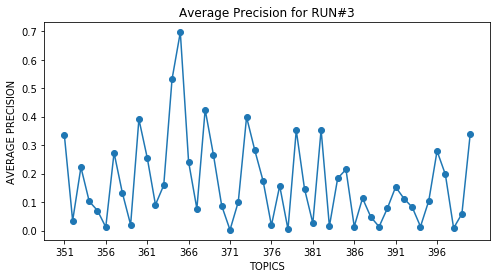

In [17]:
def plot(array,ylabel,xlabel,title,yvalues,x):
    measures=list(map(float,array))
    plt.plot(x,measures,marker="o")
    plt.title(title)
    plt.xlabel("TOPICS",fontsize=10)
    plt.xticks(yvalues)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    plt.ylabel(ylabel,fontsize=10)
#plt.plot(radius, square, marker='o', linestyle='--', color='r', label='Square')
# Prints: [6.0, 4.0]
    plt.rcParams["figure.figsize"] = [8.0,4.0]
    plt.show()

#plotto le MAP delle varie RUN
plot(maps,"MAP","RUN","MAP value for each run",range(4),range(4))
    
    
plot(ap_bm250,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#0",range(351,400,5),range(351,401))
plot(ap_tfidf1,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#1",range(351,400,5),range(351,401))
plot(ap_bm252,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#2",range(351,400,5),range(351,401))
plot(ap_tfidf3,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#3",range(351,400,5),range(351,401))

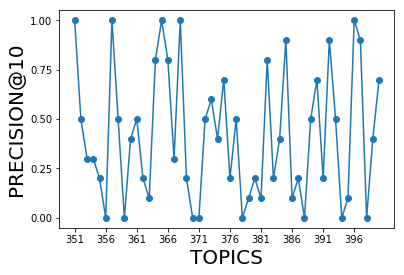

In [6]:
#devo plottare la precision,map e rprec per ogni topic per ogni run, creo 4 grafici (uno per RUN) in cui inserisco in y la P_10 e in x i topic
p10=list(map(float,p10_bm250))
plt.plot(range(351,401),p10,marker="o")
plt.xlabel("TOPICS",fontsize=20)
plt.xticks(range(351,400,5))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.ylabel("PRECISION@10",fontsize=20)
#plt.plot(radius, square, marker='o', linestyle='--', color='r', label='Square')
# Prints: [6.0, 4.0]
#plt.rcParams["figure.figsize"] = [18.0,12.0]
plt.show()
#print("Current size:", fig_size)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
RUN#0  RUN#1  -0.0006  -0.0851 0.0838 False 
RUN#0  RUN#2   0.0029  -0.0816 0.0874 False 
RUN#0  RUN#3  -0.0135   -0.098 0.071  False 
RUN#1  RUN#2   0.0035   -0.081 0.088  False 
RUN#1  RUN#3  -0.0128  -0.0973 0.0716 False 
RUN#2  RUN#3  -0.0164  -0.1008 0.0681 False 
--------------------------------------------
[[-0.08511753  0.08384553]
 [-0.08159953  0.08736353]
 [-0.09796153  0.07100153]
 [-0.08096353  0.08799953]
 [-0.09732553  0.07163753]
 [-0.10084353  0.06811953]]
[False False False False False False]
[-0.000636  0.002882 -0.01348   0.003518 -0.012844 -0.016362]
[0.02305267 0.02305267 0.02305267 0.02305267 0.02305267 0.02305267]
3.6647169573500507
[0.04224076 0.04224076 0.04224076 0.04224076]


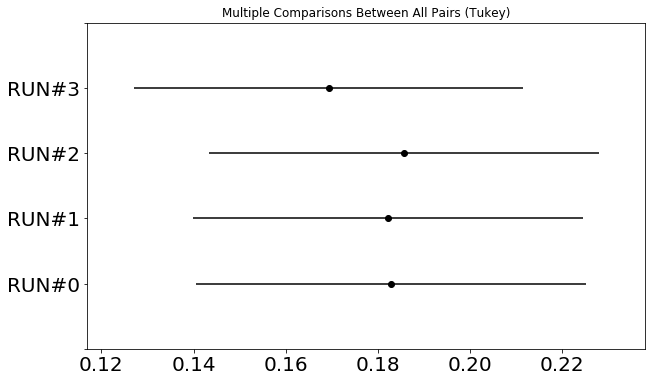

In [7]:
from statsmodels.stats.multicomp import MultiComparison
#concateno le varie AP dei vari topic 
vector_maps=np.concatenate([ap_bm250, ap_tfidf1, ap_bm252, ap_tfidf3])
#print(vector_maps)
#creo e popolo il vettore relativo alle RUN
runID=[]
for i in range(4):
#popolo il vettore
    for index in range(50):
        runID.append("RUN#"+str(i))
        
mc = MultiComparison(vector_maps.astype('float'), runID)
result = mc.tukeyhsd(alpha)
 
print(result)
#print(mc.groupsunique)
#metodi a disposizione di result: reject, meandiffs, confint, std_pairs, q_crit, halfwidths
print(result.confint)
print(result.reject)
print(result.meandiffs)
print(result.std_pairs)
print(result.q_crit)
result.plot_simultaneous()
print(result.halfwidths)